In [5]:
''' Bibliotecas que serão utilizadas para a análise e limpeza dos dados '''
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [6]:

## Loading our data from the data folders

orders = pd.read_csv('../data/raw/orders.csv')
products = pd.read_csv('../data/raw/product.csv')
client_ch = pd.read_csv('../data/raw/client.challenge.csv')
client_tr = pd.read_csv('../data/raw/client.train.csv')
client_te = pd.read_csv('../data/raw/client.test.csv')

In [10]:
client_ch.head(2)

,client_id,birthdate,state,gender
0,cx12525,1932-04-19,st15,cg1
1,cx32280,1983-03-01,st15,cg1


In [11]:
client_tr.head(2)

,client_id,birthdate,state,gender,is_churn
0,cx05072,1972-03-22,st25,cg2,False
1,cx03836,1966-08-14,st15,cg1,False


In [12]:
client_te.head(2)

,client_id,birthdate,state,gender,is_churn
0,cx06840,1982-12-03,st15,cg1,False
1,cx01931,1979-05-09,st15,cg1,False


# Info
📋 Tabelas - orders, product

🔑 Chaves em comum -  product_id

🎯 Variável target/interesse - is_churn inside client_tr & client_te

In [7]:
orders.head()

,order_id,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source
0,ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.9,pm05,NaN,NaN,st07,dv9,sc08
1,ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.9,pm05,NaN,NaN,st07,dv9,sc08
2,ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.9,pm05,NaN,NaN,st07,dv9,sc08
3,ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.9,pm05,NaN,NaN,st07,dv9,sc08
4,ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.0,pm05,NaN,NaN,st07,dv9,sc08


In [9]:
products.head()

,product_id,category_lv0,category_lv1,category_lv2,category_lv3,category_lv4
0,px01237,mk38,mk38:072,mk38:072:149,mk38:072:149:218,mk38:072:149:218:04846
1,px11510,mk38,mk38:072,mk38:072:149,mk38:072:149:218,mk38:072:149:218:01337
2,px03782,mk38,mk38:072,mk38:072:019,mk38:072:019:066,mk38:072:019:066:02321
3,px04092,mk38,mk38:072,mk38:072:019,mk38:072:019:054,mk38:072:019:054:06035
4,px07429,mk38,mk38:072,mk38:072:078,mk38:072:078:182,mk38:072:078:182:07218


### Correlação

Uma das ferramentas mais importantes na análise de dados é a Correlação

![Correlação](imgs/correlation.png)

Analisando como as variáveis estão distribuídas dentro de um plano cartesianos quando "batidas" umas com as outras nos mostra o quanto a presença de uma variável explica outra variável

Saber o coeficiente de correlação linear pode nos ajudar a prever valores futuros

[COEFICIENTE DE CORRELAÇÃO LINEAR - MATEMATICA RAPIDOLA](https://www.youtube.com/watch?v=ayAxTRN4aVg)

<AxesSubplot:>

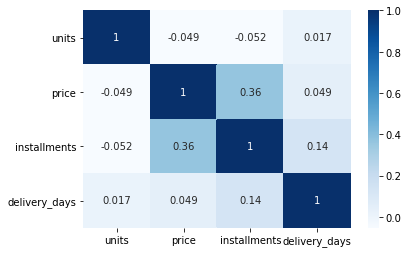

In [16]:
sns.heatmap(orders.corr(),cmap="Blues", annot=True)

<AxesSubplot:xlabel='price', ylabel='installments'>

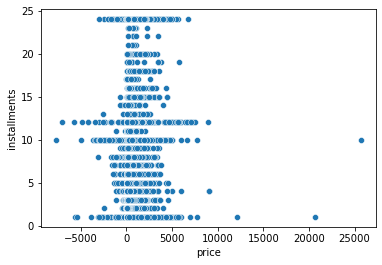

In [17]:
sns.scatterplot(data=orders,
                x="price",
                y="installments")

<AxesSubplot:xlabel='price', ylabel='units'>

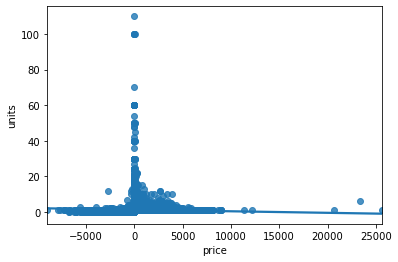

In [19]:
sns.regplot(data=orders,
                x="price",
                y="units")

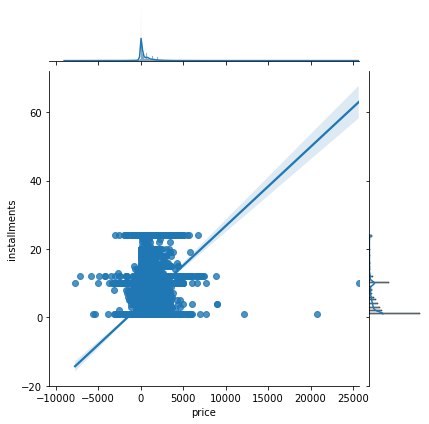

In [20]:
sns.jointplot(data=orders,
              x="price",
              y="installments",
              kind="reg")

# Missing Values

Here, we will use the power of Missingno to find missing information inside our data
This will help us understand our dataset and begin the Data Cleaning process

In [23]:
#!pip install missingno
import missingno as msno

Index(['order_id', 'client_id', 'product_id', 'datetime', 'units', 'price',
       'payment_method', 'installments', 'delivery_days', 'delivery_state',
       'device', 'source'],
      dtype='object')


<AxesSubplot:>

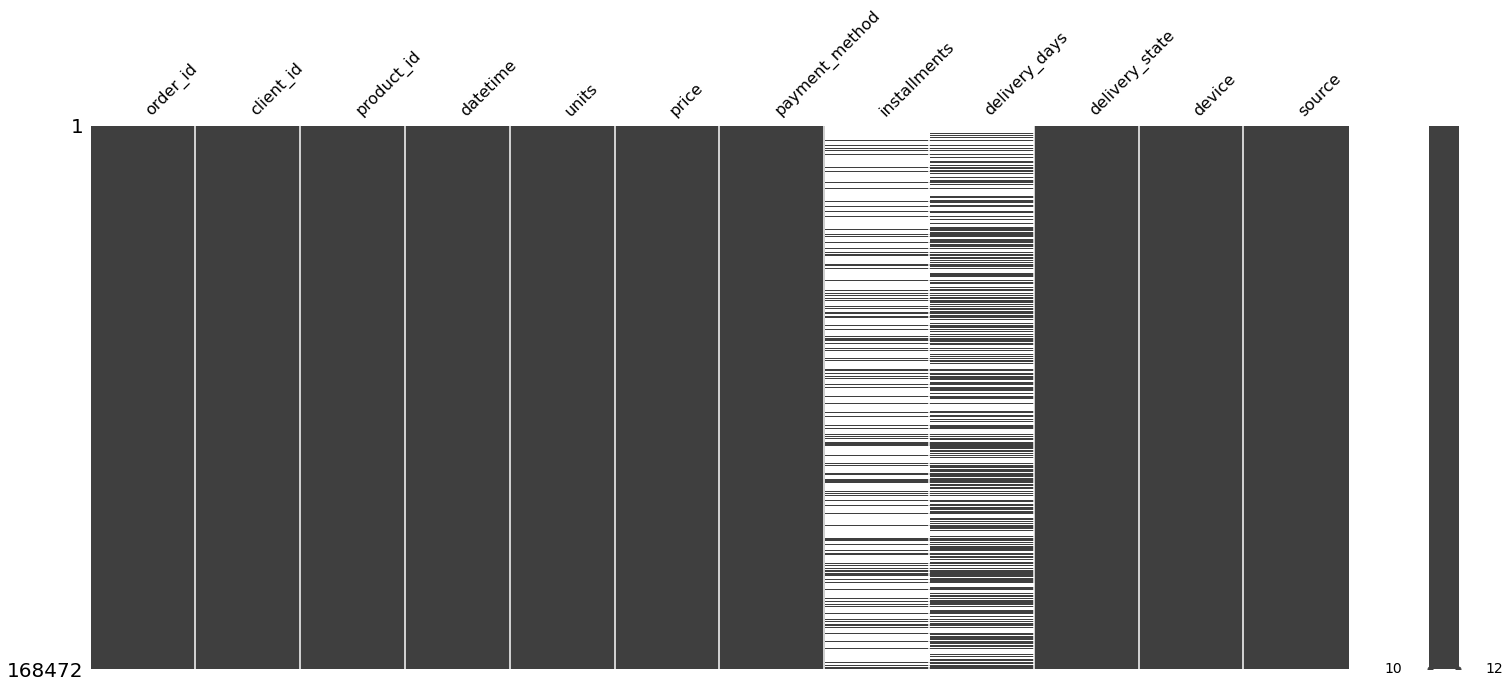

In [24]:
print(orders.keys())
msno.matrix(orders)

In [26]:
orders[orders["installments"].isna()].head()

,order_id,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source
0,ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.9,pm05,NaN,NaN,st07,dv9,sc08
1,ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.9,pm05,NaN,NaN,st07,dv9,sc08
2,ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.9,pm05,NaN,NaN,st07,dv9,sc08
3,ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.9,pm05,NaN,NaN,st07,dv9,sc08
4,ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.0,pm05,NaN,NaN,st07,dv9,sc08


In [27]:
orders['has_installments'] = np.where(orders["installments"].isna() == False, 1, 0)
orders.head()

,order_id,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source,has_installments
0,ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.9,pm05,NaN,NaN,st07,dv9,sc08,0
1,ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.9,pm05,NaN,NaN,st07,dv9,sc08,0
2,ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.9,pm05,NaN,NaN,st07,dv9,sc08,0
3,ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.9,pm05,NaN,NaN,st07,dv9,sc08,0
4,ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.0,pm05,NaN,NaN,st07,dv9,sc08,0


In [28]:
orders[orders["has_installments"] == True].head()

,order_id,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source,has_installments
40,ox095115,cx06182,px07463,2019-09-18 10:27:00,1.0,799.20,pm14,10.0,1.0,st15,dv3,sc09,1
112,ox026209,cx19443,px00557,2019-09-03 19:19:00,1.0,189.05,pm02,1.0,7.0,st15,dv3,sc09,1
116,ox053945,cx01320,px09710,2019-08-15 13:56:00,1.0,349.90,pm09,4.0,0.0,st25,dv4,sc04,1
119,ox045760,cx01320,px09710,2019-08-15 14:30:00,1.0,332.41,pm04,1.0,0.0,st25,dv4,sc04,1
120,ox008514,cx01320,px01037,2019-10-04 21:44:00,1.0,37.00,pm04,1.0,2.0,st25,dv4,sc04,1


<AxesSubplot:>

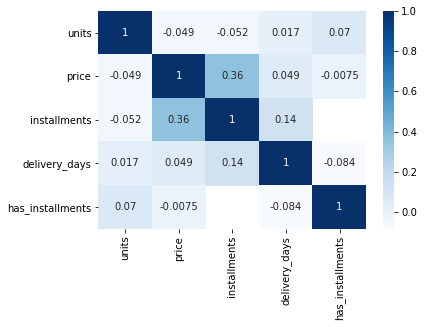

In [29]:
sns.heatmap(orders.corr(), cmap="Blues", annot=True)

<AxesSubplot:xlabel='units', ylabel='has_installments'>

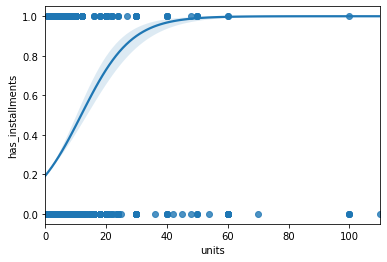

In [30]:
sns.regplot(data=orders,
            x="units",
            y="has_installments",
            logistic=True)

<AxesSubplot:xlabel='units', ylabel='installments'>

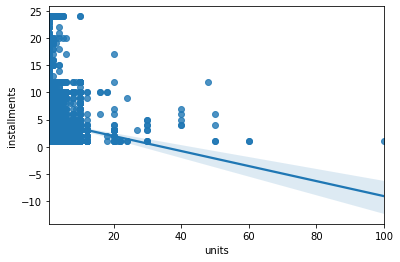

In [31]:
sns.regplot(data=orders,
            x="units",
            y="installments")

In [32]:
orders['installments'] = np.where(orders["installments"].isna() == True, 0, orders['installments'])

In [33]:
orders['has_installments'] = np.where(orders["installments"].isna() == False, 1, 0)
orders.head()

,order_id,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source,has_installments
0,ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.9,pm05,0.0,NaN,st07,dv9,sc08,1
1,ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.9,pm05,0.0,NaN,st07,dv9,sc08,1
2,ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.9,pm05,0.0,NaN,st07,dv9,sc08,1
3,ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.9,pm05,0.0,NaN,st07,dv9,sc08,1
4,ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.0,pm05,0.0,NaN,st07,dv9,sc08,1


<AxesSubplot:xlabel='units', ylabel='installments'>

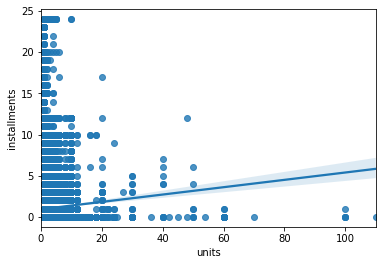

In [34]:
sns.regplot(data=orders,
            x="units",
            y="installments")

<AxesSubplot:>

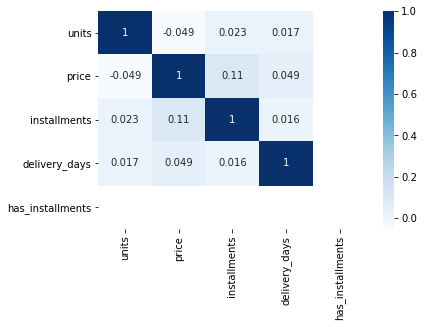

In [35]:
sns.heatmap(orders.corr(), cmap="Blues", annot=True)

In [36]:
orders[orders["delivery_days"].isna()].head()

,order_id,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source,has_installments
0,ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.9,pm05,0.0,NaN,st07,dv9,sc08,1
1,ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.9,pm05,0.0,NaN,st07,dv9,sc08,1
2,ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.9,pm05,0.0,NaN,st07,dv9,sc08,1
3,ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.9,pm05,0.0,NaN,st07,dv9,sc08,1
4,ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.0,pm05,0.0,NaN,st07,dv9,sc08,1


In [37]:
orders['has_delivery_days'] = np.where(orders["delivery_days"].isna() == False, 1, 0)
orders.head()

,order_id,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source,has_installments,has_delivery_days
0,ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.9,pm05,0.0,NaN,st07,dv9,sc08,1,0
1,ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.9,pm05,0.0,NaN,st07,dv9,sc08,1,0
2,ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.9,pm05,0.0,NaN,st07,dv9,sc08,1,0
3,ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.9,pm05,0.0,NaN,st07,dv9,sc08,1,0
4,ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.0,pm05,0.0,NaN,st07,dv9,sc08,1,0


<AxesSubplot:>

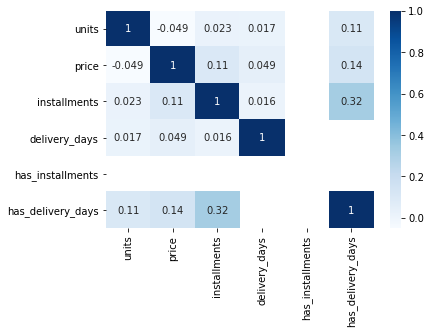

In [38]:
sns.heatmap(orders.corr(), cmap="Blues", annot=True)

<AxesSubplot:xlabel='units', ylabel='has_delivery_days'>

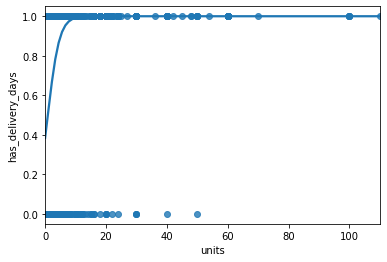

In [39]:
sns.regplot(data=orders,
            x="units",
            y="has_delivery_days",
            logistic=True)

<AxesSubplot:xlabel='price', ylabel='has_delivery_days'>

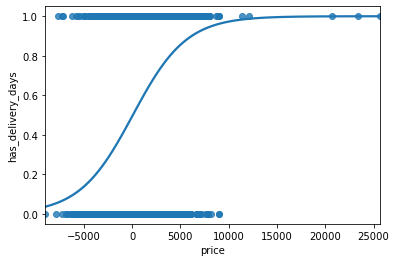

In [40]:
sns.regplot(data=orders,
            x="price",
            y="has_delivery_days",
            logistic=True)

<AxesSubplot:xlabel='installments', ylabel='has_delivery_days'>

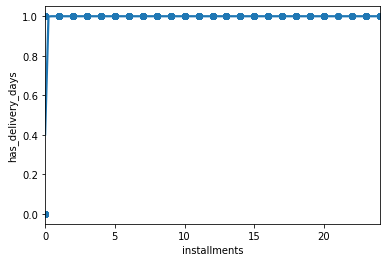

In [42]:
sns.regplot(data=orders,
            x="installments",
            y="has_delivery_days",
            logistic=True)

# Merging data

In [45]:
customer_orders = orders.merge(client_ch,how='right', on="client_id")

<AxesSubplot:xlabel='price', ylabel='has_delivery_days'>

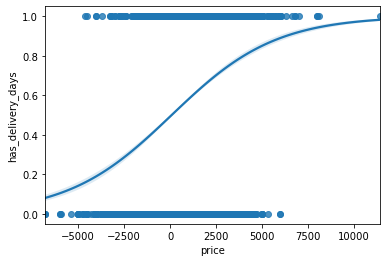

In [46]:
sns.regplot(data=customer_orders,
            x="price",
            y="has_delivery_days",
            logistic=True)

In [47]:
customer_orders.head()

,order_id,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source,has_installments,has_delivery_days,birthdate,state,gender
0,ox036927,cx12525,px09033,2019-01-09 17:49:00,1.0,103.98,pm05,0.0,NaN,st07,dv9,sc08,1,0,1932-04-19,st15,cg1
1,ox036927,cx12525,px10504,2019-01-09 17:49:00,1.0,126.74,pm05,0.0,NaN,st07,dv9,sc08,1,0,1932-04-19,st15,cg1
2,ox036927,cx12525,px03793,2019-01-09 17:49:00,1.0,50.97,pm05,0.0,NaN,st07,dv9,sc08,1,0,1932-04-19,st15,cg1
3,ox036927,cx12525,px04284,2019-01-09 17:49:00,1.0,86.50,pm05,0.0,NaN,st07,dv9,sc08,1,0,1932-04-19,st15,cg1
4,ox109415,cx12525,px04031,2019-11-13 14:56:00,1.0,9.90,pm05,0.0,NaN,st07,dv9,sc08,1,0,1932-04-19,st15,cg1


In [48]:
customer_orders.to_csv("../data/processed/customer_orders.csv")

In [50]:
customer_orders[customer_orders["price"] < 0].head()

,order_id,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source,has_installments,has_delivery_days,birthdate,state,gender
9,ox013255,cx00471,px10138,2019-02-09 13:48:00,0.89221,-408.88,pm05,0.0,NaN,st07,dv9,sc08,1,0,1964-08-30,st15,cg2
10,ox013255,cx00471,px10138,2019-02-09 13:48:00,0.10779,-408.88,pm05,0.0,NaN,st07,dv9,sc08,1,0,1964-08-30,st15,cg2
53,ox127510,cx38469,px12369,2019-05-28 17:27:00,0.80064,-945.00,pm05,0.0,NaN,st07,dv9,sc08,1,0,1976-09-09,st25,cg1
54,ox127510,cx38469,px12369,2019-05-28 17:27:00,0.19936,-945.00,pm05,0.0,NaN,st07,dv9,sc08,1,0,1976-09-09,st25,cg1
56,ox023178,cx38469,px12246,2019-06-26 20:38:00,0.78433,-3199.00,pm05,0.0,NaN,st25,dv3,sc12,1,0,1976-09-09,st25,cg1


In [51]:
customer_orders['has_discount'] = np.where(customer_orders["price"] < 0, 1, 0)
customer_orders.head()

,order_id,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source,has_installments,has_delivery_days,birthdate,state,gender,has_discount
0,ox036927,cx12525,px09033,2019-01-09 17:49:00,1.0,103.98,pm05,0.0,NaN,st07,dv9,sc08,1,0,1932-04-19,st15,cg1,0
1,ox036927,cx12525,px10504,2019-01-09 17:49:00,1.0,126.74,pm05,0.0,NaN,st07,dv9,sc08,1,0,1932-04-19,st15,cg1,0
2,ox036927,cx12525,px03793,2019-01-09 17:49:00,1.0,50.97,pm05,0.0,NaN,st07,dv9,sc08,1,0,1932-04-19,st15,cg1,0
3,ox036927,cx12525,px04284,2019-01-09 17:49:00,1.0,86.50,pm05,0.0,NaN,st07,dv9,sc08,1,0,1932-04-19,st15,cg1,0
4,ox109415,cx12525,px04031,2019-11-13 14:56:00,1.0,9.90,pm05,0.0,NaN,st07,dv9,sc08,1,0,1932-04-19,st15,cg1,0
